In [ ]:
#This notebook is meant to be run in google colab
#It simulates the games between agents and saves the dataframe with the results

In [1]:
!pip install kaggle_environments

     |████████████████████████████████| 686kB 28.0MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
ERROR: nbclient 0.5.3 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from kaggle_environments import make
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading environment football failed: No module named 'gfootball'


In [4]:
def analyze_game(i, game_json, results):
  n_game = i + 1
  steps_played = len(game_json['steps'])
  rewards_sorted = sorted(game_json['rewards'], reverse=True)
  places = [rewards_sorted.index(k) + 1 for k in game_json['rewards']]
  results.append([n_game, steps_played] + game_json['rewards'] + places)
  return results

In [11]:
#set path to where you store the agents
agents_path = '/content/drive/MyDrive/Colab_Notebooks/LMU_HCA'
results_path = '/content/drive/MyDrive/Colab_Notebooks/LMU_HCA'

#decide which agents should play and how many games
agents_list = [f'{agents_path}/submission.py', f'{agents_path}/imitation_human.py', f'{agents_path}/simple_agent.py']#, f'{agents_path}/main.py']
n_games = 10

In [12]:
results = []
for i in range(n_games):
  env = make("hungry_geese", debug=True)
  env.reset()
  env.run(agents_list)
  game_json = env.toJSON()
  result = analyze_game(i, game_json, results)

Body Hit: (2, <Action.SOUTH: 3>, 39, [28, 27, 38, 39, 50, 61, 62, 51, 52])
Goose Collision: SOUTH
Goose Collision: WEST
Opposite action: (2, <Action.WEST: 4>, <Action.EAST: 2>)
Goose Starved: Action.WEST
Opposite action: (2, <Action.NORTH: 1>, <Action.SOUTH: 3>)
Goose Starved: Action.WEST
Opposite action: (2, <Action.EAST: 2>, <Action.WEST: 4>)
Goose Starved: Action.NORTH
Goose Collision: EAST
Body Hit: (1, <Action.WEST: 4>, 46, [47, 48, 37, 36, 35, 46, 57, 68, 2, 1, 0])
Goose Collision: EAST
Goose Collision: SOUTH
Opposite action: (1, <Action.NORTH: 1>, <Action.SOUTH: 3>)
Goose Collision: NORTH
Goose Collision: NORTH
Opposite action: (2, <Action.SOUTH: 3>, <Action.NORTH: 1>)
Opposite action: (2, <Action.NORTH: 1>, <Action.SOUTH: 3>)
Goose Starved: Action.WEST
Opposite action: (2, <Action.NORTH: 1>, <Action.SOUTH: 3>)
Body Hit: (1, <Action.WEST: 4>, 29, [30, 19, 8, 74, 63, 52, 41, 40, 29, 18, 7, 73, 62, 51, 50])


In [13]:
columns = ['n_game', 'steps_played'] + [f'{i.split("/")[-1]}_REWARD' for i in agents_list] + [f'{i.split("/")[-1]}_PLACE' for i in agents_list]
df_results = pd.DataFrame(results, columns = columns)

In [14]:
df_results

,n_game,steps_played,submission.py_REWARD,imitation_human.py_REWARD,simple_agent.py_REWARD,submission.py_PLACE,imitation_human.py_PLACE,simple_agent.py_PLACE
0,1,60,5912,5904,3010,1,2,3
1,2,41,4106,4001,1202,1,2,3
2,3,41,4111,4001,902,1,2,3
3,4,121,12104,12001,502,1,2,3
4,5,130,13021,12912,2705,1,2,3
5,6,11,1105,1002,1003,1,3,2
6,7,71,7109,2502,7010,1,3,2
7,8,123,12311,7406,12219,1,3,2
8,9,161,16107,16001,602,1,2,3
9,10,139,13921,13816,401,1,2,3


In [15]:
df_results.to_csv(f'{results_path}/results_{n_games}.csv', index=False)

In [16]:
df_r = pd.read_csv(f'/content/drive/MyDrive/Colab_Notebooks/LMU_HCA/results_{n_games}.csv')

<BarContainer object of 2 artists>

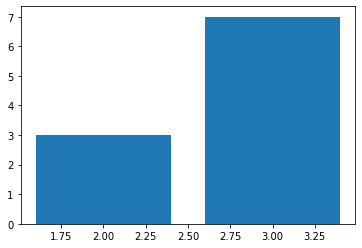

In [17]:
#plt.bar(*np.unique(df_r['submission.py_PLACE'].astype(int).to_numpy(), return_counts=True))
#plt.bar(*np.unique(df_r['imitation_human.py_PLACE'].astype(int).to_numpy(), return_counts=True))
#plt.bar(*np.unique(df_r['main.py_PLACE'].astype(int).to_numpy(), return_counts=True))
plt.bar(*np.unique(df_r['simple_agent.py_PLACE'].astype(int).to_numpy(), return_counts=True))

In [18]:
df_r['submission.py_REWARD'].mean()
#df_r['imitation_human.py_REWARD'].mean()
#df_r['main.py_REWARD'].mean()
#df_r['simple_agent.py_REWARD'].mean()

8980.7

In [19]:
df_r

,n_game,steps_played,submission.py_REWARD,imitation_human.py_REWARD,simple_agent.py_REWARD,submission.py_PLACE,imitation_human.py_PLACE,simple_agent.py_PLACE
0,1,60,5912,5904,3010,1,2,3
1,2,41,4106,4001,1202,1,2,3
2,3,41,4111,4001,902,1,2,3
3,4,121,12104,12001,502,1,2,3
4,5,130,13021,12912,2705,1,2,3
5,6,11,1105,1002,1003,1,3,2
6,7,71,7109,2502,7010,1,3,2
7,8,123,12311,7406,12219,1,3,2
8,9,161,16107,16001,602,1,2,3
9,10,139,13921,13816,401,1,2,3
